In [1]:
#DATS 6103 – Individual Project 2 – Vishnupriya Venkateswaran
#The purpose of this project is to study Airbnb as a potential competitor on the Hotel Industry 

In [2]:
#Install and load required python packages

!pip install uszipcode
!pip install folium
!pip install branca
!pip install jinja2
!pip install requests
!pip install six
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
from gmplot import gmplot
import math
import folium
from datetime import *
from uszipcode import ZipcodeSearchEngine

In [3]:
pd.set_option('display.precision',2)

In [4]:
#Load the csv files and create the data frame for Airbnb listings data for Boston,Washinton DC and NewYork with required columns

#1.Boston Airbnb listings

listings_boston = pd.read_csv('Data/Boston/airbnb_listings_boston.csv',encoding='iso8859',
                        
                      usecols = ['id','name','host_id', 'host_name','host_since','neighbourhood','latitude', 'longitude','room_type','property_type', 'price','minimum_nights',
                     'number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365'])
listings_boston.head()

,id,name,host_id,host_name,host_since,neighbourhood,latitude,longitude,property_type,room_type,price,minimum_nights,availability_365,number_of_reviews,calculated_host_listings_count,reviews_per_month
0,20872145,Charming Boston Residential,94870110,Zay,9/12/2016,Roslindale,42.27,-71.14,Apartment,Private room,$60.00,1,164,2,1,2.00
1,13937181,Guest Room in Cozy Home,82861960,Lelia,7/10/2016,Roslindale,42.28,-71.14,House,Private room,$45.00,2,146,29,1,1.97
2,3575220,The Artist room in beautiful villa.,13226301,Mohamed,3/17/2014,Roslindale,42.28,-71.14,House,Private room,$50.00,2,286,17,3,0.45
3,17419858,Large Bedroom in WestRoxbury/Rozzie,114515516,William,2/2/2017,Roslindale,42.29,-71.14,Apartment,Private room,$65.00,6,85,5,2,0.74
4,18202496,Bright and peaceful room in Roslindale Village,61261721,Kate,3/2/2016,Roslindale,42.29,-71.14,House,Private room,$56.00,1,0,3,1,1.32


In [5]:
#2.Washinton DC Airbnb listings

listings_dc = pd.read_csv('Data/WashintonDC/airbnb_listings_DC.csv',encoding='iso8859',
                        
                 usecols = ['id','name','host_id', 'host_name','host_since','neighbourhood','neighbourhood_cleansed','zipcode','latitude', 'longitude','room_type', 'price','minimum_nights',
                 'availability_365','number_of_reviews','calculated_host_listings_count'],dtype={'host_since':int})

listings_dc.head()

,id,name,host_id,host_name,host_since,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,room_type,price,minimum_nights,availability_365,number_of_reviews,calculated_host_listings_count
0,4873463,"Cozy Pied-a-Terre, the Heart of DC",7220554,TheoDora,2013,U Street Corridor,"Dupont Circle, Connecticut Avenue/K Street",20009,38.92,-77.04,Entire home/apt,$95.00,2,53,29,3
1,16736650,"Large, welcoming studio in a central location",47945335,Nina,2015,Dupont Circle,"Dupont Circle, Connecticut Avenue/K Street",20009,38.91,-77.04,Entire home/apt,$200.00,1,0,2,1
2,14999877,Newly Renovated Apartment in the Heart of DC,10325135,Rory,2013,U Street Corridor,"Dupont Circle, Connecticut Avenue/K Street",20009,38.92,-77.04,Entire home/apt,$100.00,27,0,0,1
3,5955860,Spacious Dupont Circle Condo,3873893,Feras,2012,Dupont Circle,"Dupont Circle, Connecticut Avenue/K Street",20036,38.91,-77.05,Entire home/apt,$129.00,2,324,79,2
4,15655208,Luxury historic rowhouse; Adams Morgan/Dupont/...,73613929,Courtney,2016,U Street Corridor,"Dupont Circle, Connecticut Avenue/K Street",20009,38.92,-77.04,Entire home/apt,$500.00,2,81,1,1


In [6]:
#3. NewYork Airbnb Listings

listings_ny = pd.read_csv(r'Data/NewYork/airbnb_listings_nyc.csv',encoding='iso8859',
            usecols = ['id','name','host_id','host_since','neighbourhood','neighbourhood_cleansed','latitude', 'longitude',
                       'room_type','price'],dtype={'host_since':int})

listings_ny.head()

,id,name,host_id,host_since,neighbourhood,neighbourhood_cleansed,latitude,longitude,room_type,price
0,6799864,NYC apt -FREE - in exchange for dog sitting,35595560,2015,Washington Heights,Washington Heights,40.86,-73.94,Entire home/apt,59
1,17437106,Couch in Harlem Harvey Refugees only,33511962,2015,Harlem,Harlem,40.81,-73.95,Shared room,39
2,17952277,"Newly renovated, fully furnished room in Brooklyn",62685070,2016,Bushwick,Bushwick,40.70,-73.92,Private room,225
3,17979764,Jen Apt,84497333,2016,Soho,SoHo,40.72,-74.00,Private room,70
4,18490141,IT'S SIMPLY CONVENIENT!,97001292,2016,Jamaica,Jamaica,40.69,-73.80,Entire home/apt,150


In [7]:
#Exploratory Data Analysis on Airbnb listings data

#Analyzing distribution of listings based on Boston's neighborhood

listings_boston['neighbourhood'] = listings_boston.neighbourhood.ffill()

#Create a new data frame to plot the number of airbnb listings in each neighbourhood 
newDF = pd.DataFrame()
newDF['neighbourhood']=listings_boston['neighbourhood']

toplot = pd.DataFrame()

toplot['total_hosts'] = newDF['neighbourhood'].value_counts()

toplot = toplot[ toplot['total_hosts'] > 5 ]

toplot.sort_index(ascending=False, inplace=True)
toplot

#Formatting the data
listings_boston['price'] = listings_boston.price.apply(lambda x: x.replace('$',''))
listings_boston['price'] = listings_boston.price.apply(lambda x: x.replace('.00',''))
listings_boston['price'] = listings_boston.price.apply(lambda x: x.replace(',',''))
listings_boston.price = listings_boston.price.astype(np.int64)

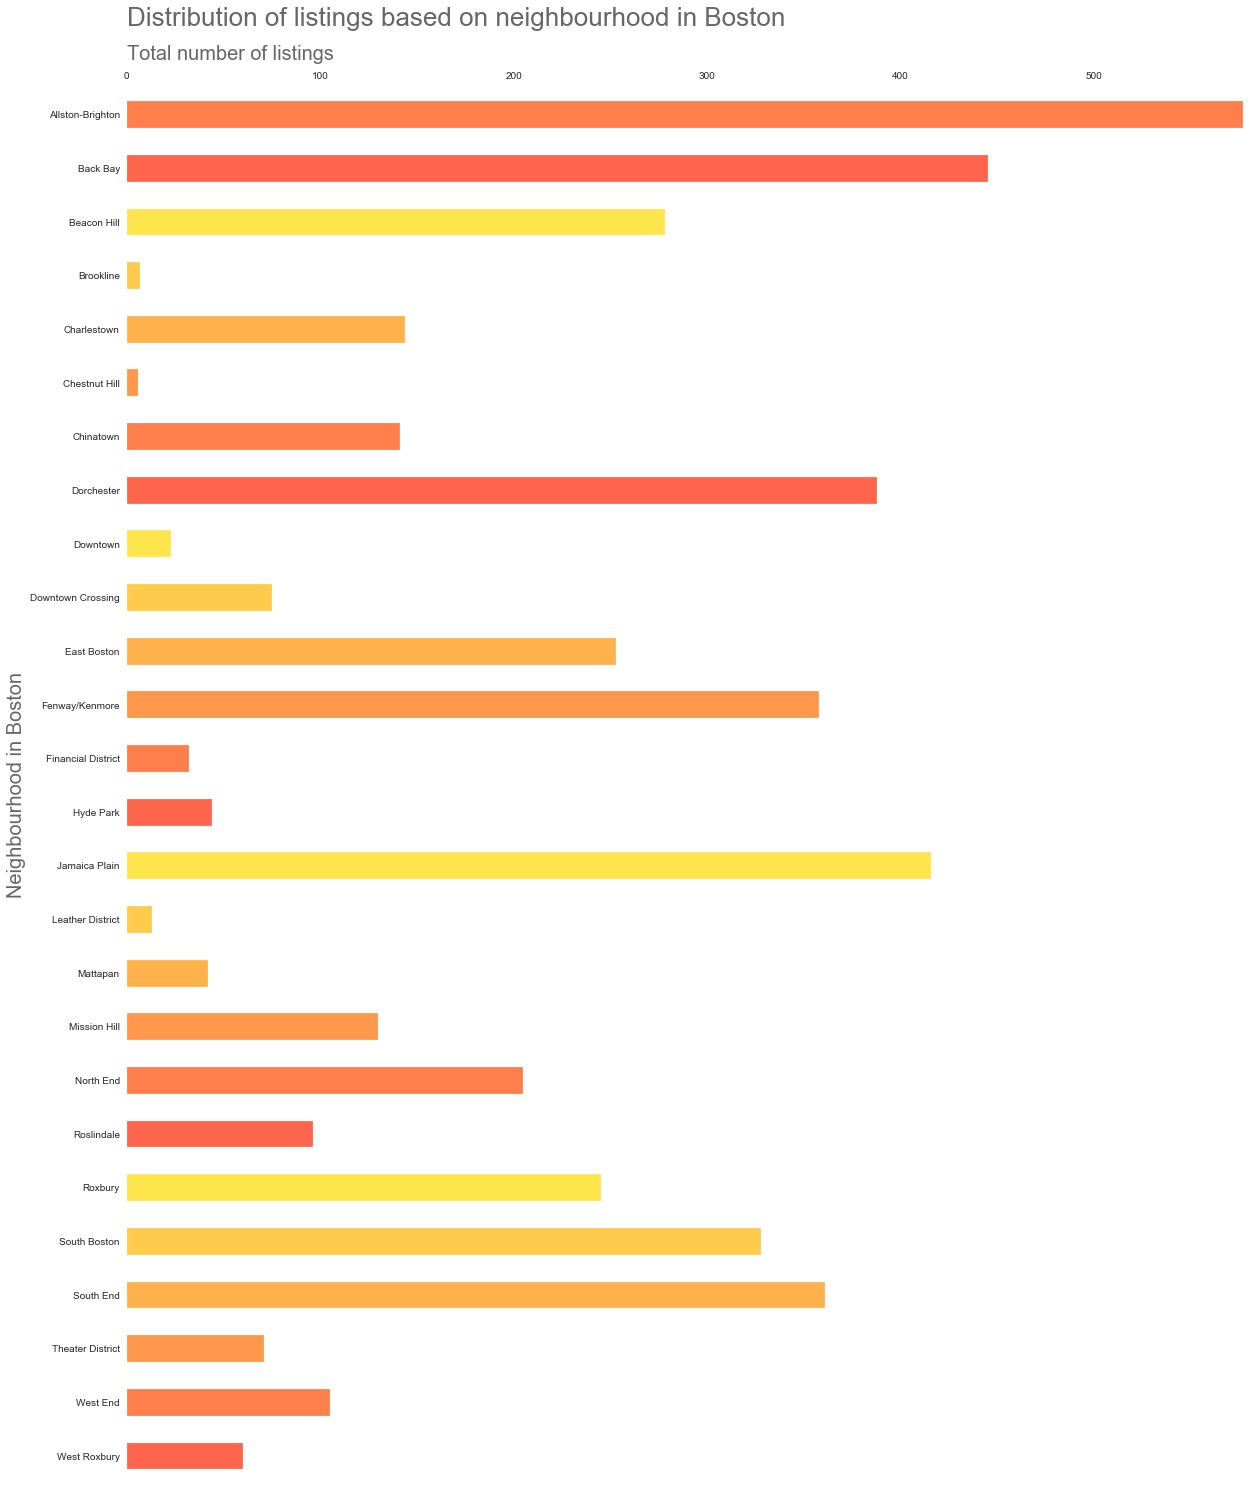

In [8]:
#Plot a horizontal bar gragh
fig = plt.figure(1, figsize=(20,25))
ax = fig.add_subplot(111)

title="Distribution of listings based on neighbourhood in Boston"

transparency = 0.7
customcmap = sns.color_palette("autumn")


toplot['total_hosts'].plot(kind='barh', ax=ax, alpha=transparency, legend=False,color=customcmap, 
                      edgecolor='w', xlim=(0,max(toplot['total_hosts'])), title=title)

ax.grid(False)
ax.set_frame_on(False)

ax.set_title(ax.get_title(), fontsize=26, alpha=transparency, ha='left')
plt.subplots_adjust(top=0.9)
ax.title.set_position((0,1.04))

ax.xaxis.set_label_position('top')
xlab = 'Total number of listings'
ax.set_xlabel(xlab, fontsize=20, alpha=transparency, ha='left')
ax.xaxis.set_label_coords(0, 1.02)
ax.xaxis.tick_top()

ylab = 'Neighbourhood in Boston'
ax.set_ylabel(ylab, fontsize=20, alpha=transparency)

ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

#Looks like Allston–Brighton has the most number of airbnb listings which makes sence because
# it is one of Boston's most vibrant neighborhoods with lots of tourist places.

#Back Bay, Dorchester(which is a famous historic neighbouhood), Jamaica plain seem to have considerably good amount of listings.

In [9]:
#Now to examine what type of properties are available in Boston's Airbnb listings

#Various property types in Airbnb
property_type_list = listings_boston['property_type'].unique().tolist()
property_type_list = [x for x in property_type_list if str(x) != 'NaN']

only_propertyType_DF = pd.DataFrame()
only_propertyType_DF['property_type'] = listings_boston['property_type']
only_propertyType_DF['room_type'] = listings_boston['room_type']
propertyDF = pd.DataFrame()
propertyDF['room_type'] = only_propertyType_DF.groupby( [ 'property_type', 'room_type'] ).size()

#Grouping the room type as entire home,private room or shared room in each property
propertyDF = propertyDF.unstack(level=-1)
propertyDF = propertyDF.xs('room_type', axis=1, drop_level=True)
propertyDF = propertyDF.reset_index()
propertyDF.rename(columns={'Entire home/apt': 'entire_home', 'Private room': 'private_room', 'Shared room': 'shared_room'}, inplace=True)

#Get count of the differnt types of properties in each type of room
propertyDF['count'] = propertyDF.sum(axis=1)

propertyDF = propertyDF[propertyDF['count'] > 10]


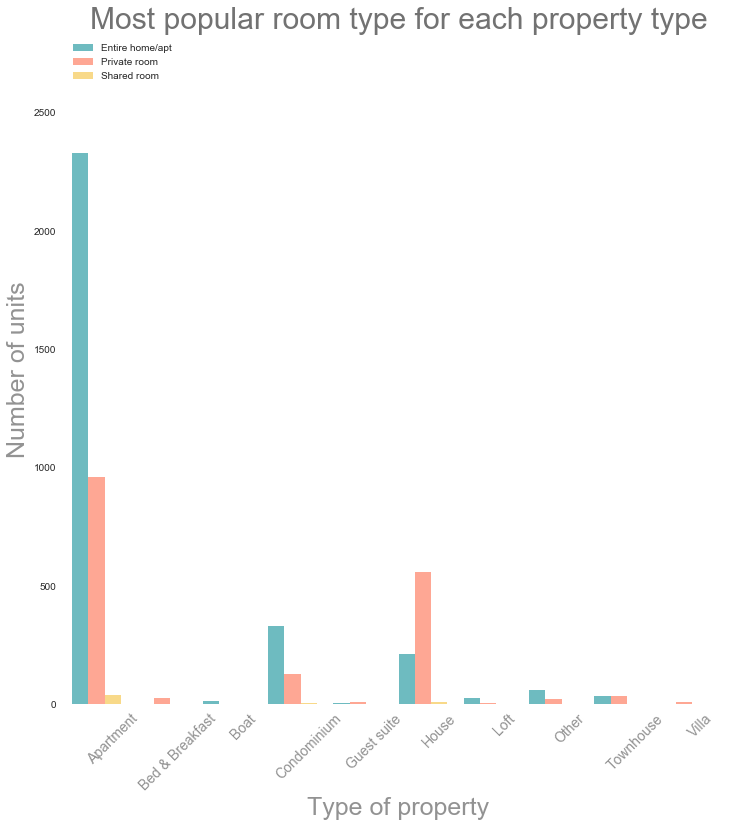

In [10]:
#To represent this visually
listings_boston.dropna()
pos = list(range(len(propertyDF['entire_home'])))
width = 0.25

fig = plt.figure(1, figsize=(12,12))
ax = fig.add_subplot(111)
ax.grid(False)
ax.set_frame_on(False)

# Create a bar with entire_home data
rect1 = plt.bar(pos,
        propertyDF['entire_home'],
        width,
        alpha=0.75,
        color='#3DA4AB',
        label=propertyDF['property_type'][0])

# Create a bar with private_room data
rect2 = plt.bar([p + width for p in pos],
        propertyDF['private_room'],
        width,
        alpha=0.75,
        color='#FE8A71',
        label=propertyDF['property_type'][1])

# Create a bar with shared_room data
rect3 = plt.bar([p + width*2 for p in pos],
        propertyDF['shared_room'],
        width,
        alpha=0.75,
        color='#F6CD61',
        label=propertyDF['property_type'][2])

# Set the y axis label
ax.set_ylabel('Number of units', 
              fontsize=25, 
              alpha=0.5)

ax.set_xlabel('Type of property', 
              fontsize=25, 
              alpha=0.5)

# Set the chart's title
ax.set_title('Most popular room type for each property type', 
             fontsize=30, 
             alpha=0.65)

plt.subplots_adjust(top=0.9)

# Set the position of the x ticks
ax.set_xticks([p + 2 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(propertyDF['property_type'], 
                   rotation=45, 
                   fontsize=14, 
                   alpha=0.5)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)

plt.ylim([0, 
          max(propertyDF['entire_home'] + propertyDF['private_room'] + propertyDF['shared_room'])-500
         ])

# Adding the legend and showing the plot
plt.legend(['Entire home/apt', 'Private room', 'Shared room'], loc='upper left')
plt.grid()
plt.show()


#Looks like apartments are the most common properties people prefer on Airbnb

In [11]:
#Next lets see Airbnb in Washington,D.C
#Plot to see how Airbnb has grown over the years in DC

#Get the unique host_id count for each year to see how much listings have grown in the years
df_groupeddata = listings_dc[['host_id','host_since']].copy()
growth=df_groupeddata.groupby(['host_since']).agg(['count'])
growth

,host_id
,count
host_since,
2008,46
2009,190
2010,113
2011,362
2012,702
2013,1166
2014,1470
2015,1740


In [12]:
#The data is not fully available for 2017, it was available only till March 2017 so let's not consider that year
airbnb_growth = growth[:-1]
airbnb_growth

,host_id
,count
host_since,
2008,46
2009,190
2010,113
2011,362
2012,702
2013,1166
2014,1470
2015,1740


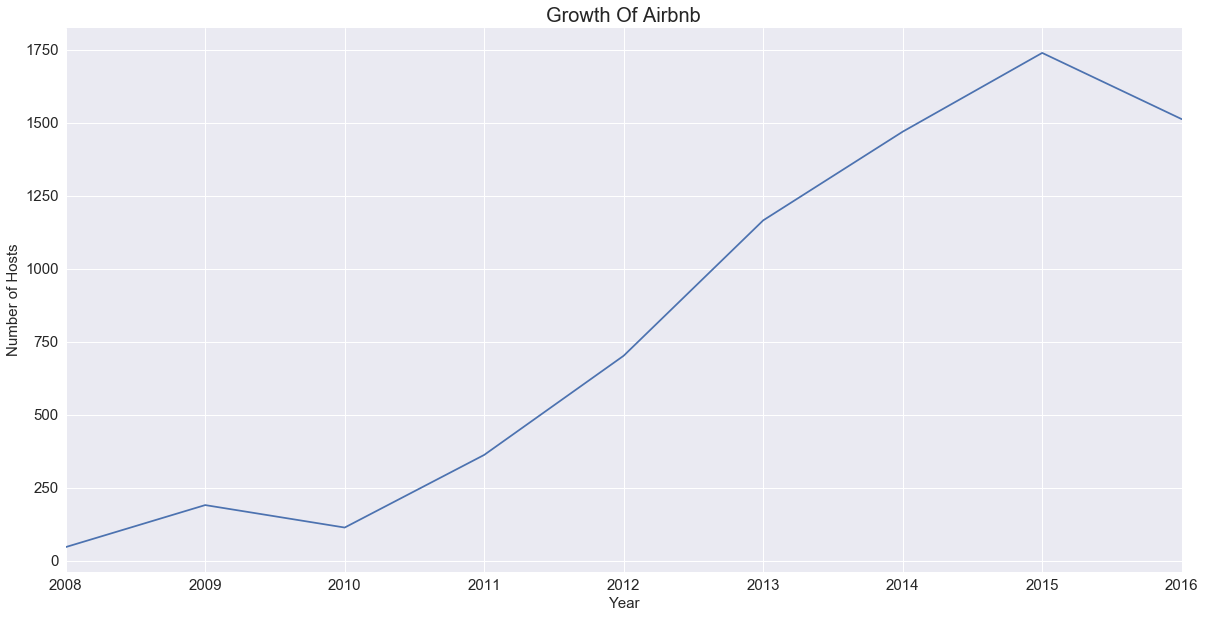

In [13]:
#To plot the growth of Airbnb over the years
ax = airbnb_growth.plot(figsize=(20,10),fontsize=15,legend=False)
ax.set_xlabel('Year',fontsize=15)
ax.set_ylabel('Number of Hosts', fontsize=15)
plt.title('Growth Of Airbnb',fontsize=20)
plt.show()

#We can see how Airbnb has grown immensely from 2010

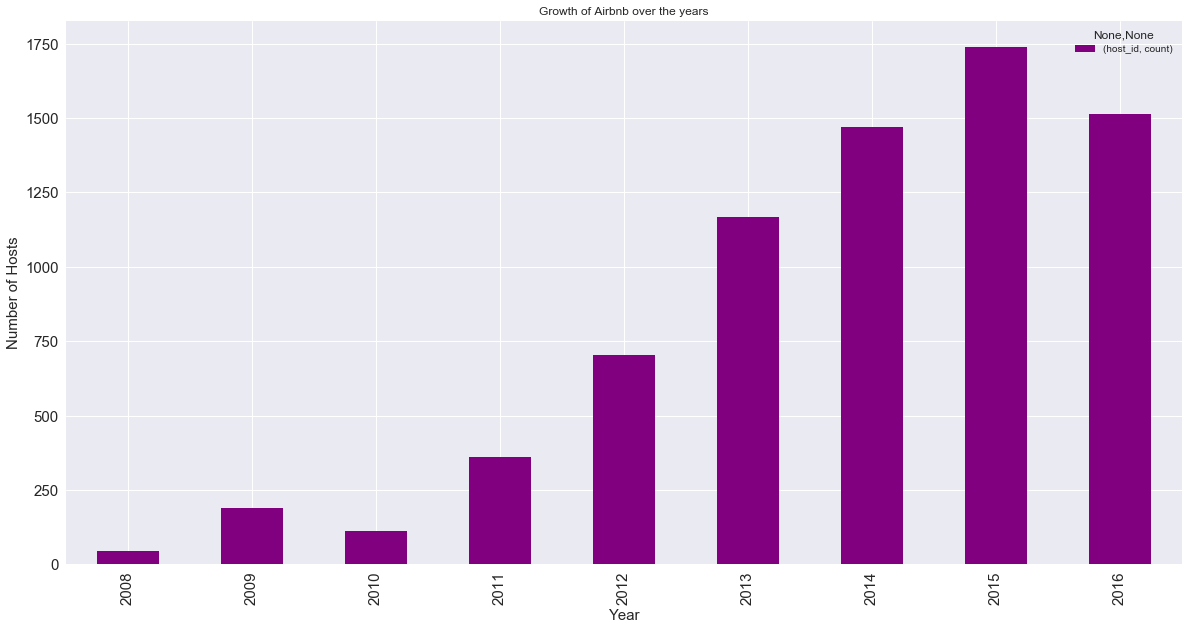

In [14]:
#bar gragh to represent the growth of airbnb over the years in dc
airbnb_growth.plot(kind='bar',figsize=(20,10),color='purple',fontsize=15,title='Growth of Airbnb over the years')
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Hosts',fontsize=15)
plt.show()

In [15]:
#To study famous Airbnb neighbourhoods in DC by their reviews
grouped_cleanlist_NH= listings_dc.groupby(['neighbourhood'])
grouped_pricelist = pd.DataFrame(grouped_cleanlist_NH["number_of_reviews","availability_365"].mean())
grouped_pricelist.head()

,number_of_reviews,availability_365
neighbourhood,,
16th Street Heights,15.29,142.34
Adams Morgan,16.25,131.45
American University Park,17.84,166.88
Anacostia,15.98,215.05
Arboretum,7.00,287.00


In [16]:
#Create a data frame for number of reviews in each neighbourhood
neighbourhood_reviews = pd.DataFrame(grouped_cleanlist_NH["number_of_reviews"].sum())
neighbourhood_reviews=neighbourhood_reviews.reset_index()
neighbourhood_reviews.head(20)

,neighbourhood,number_of_reviews
0,16th Street Heights,2003
1,Adams Morgan,4679
2,American University Park,571
3,Anacostia,655
4,Arboretum,7
5,Barney Circle,2644
6,Barry Farm,0
7,Bellevue,127
8,Benning,175
9,Benning Heights,62


In [17]:
#Sort the values to see which neighbourhood has the highest number of reviews
#Top 10 neighbourhoods in DC
data1=neighbourhood_reviews.sort_values(by='number_of_reviews',ascending=False)
top10=data1.head(10)
top10.reset_index(drop = True, inplace = True)
top10

,neighbourhood,number_of_reviews
0,Capitol Hill,13504
1,Near Northeast/H Street Corridor,7845
2,Columbia Heights,7762
3,Logan Circle,7152
4,Dupont Circle,6070
5,U Street Corridor,5277
6,Adams Morgan,4679
7,Shaw,4571
8,Bloomingdale,4077
9,Eckington,3923


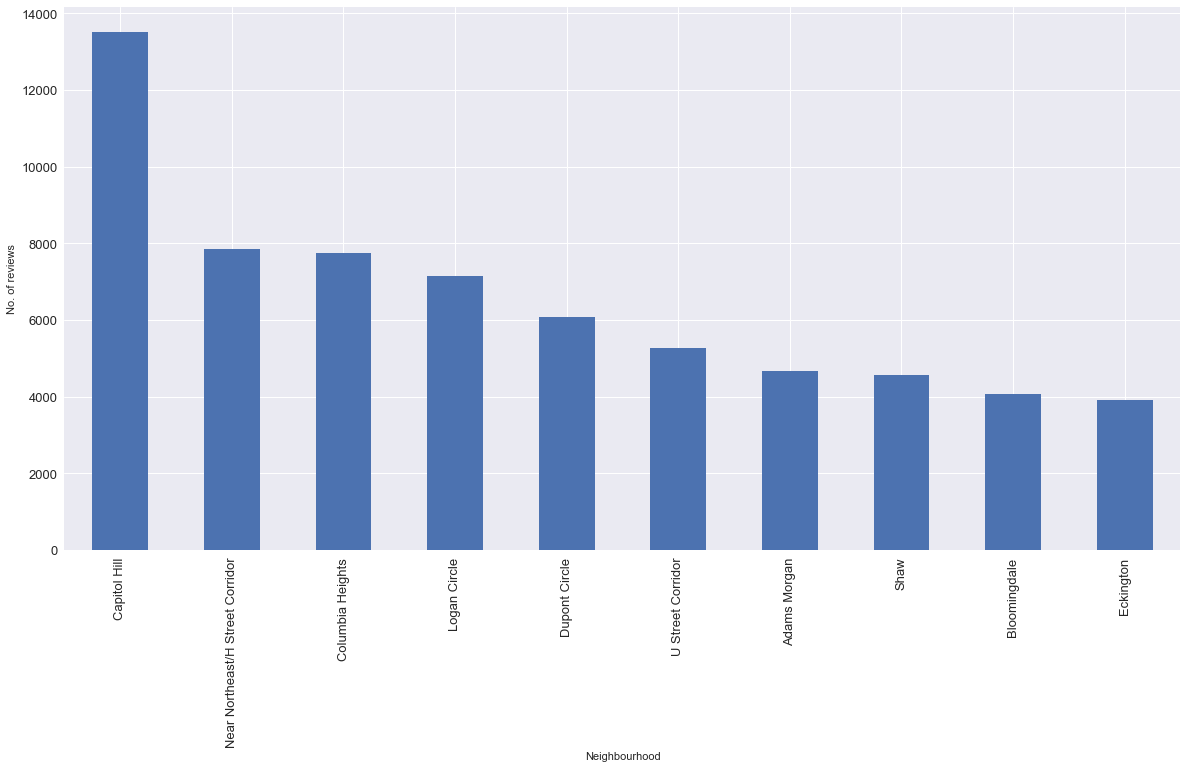

In [18]:
#To represent them visually

ax1 = top10.set_index('neighbourhood').plot(kind='bar',figsize=(20,10),fontsize=13,legend=False)
ax1.set_xlabel('Neighbourhood')
ax1.set_ylabel('No. of reviews')
plt.show()


#Capitol Hill is the most famous neighbourhood in DC

In [19]:
#Airbnb in New York City

#Airbnb growth in nyc over the years
df_groupeddata = listings_ny[['host_id','host_since']].copy()
growth=df_groupeddata.groupby(['host_since']).agg(['count'])

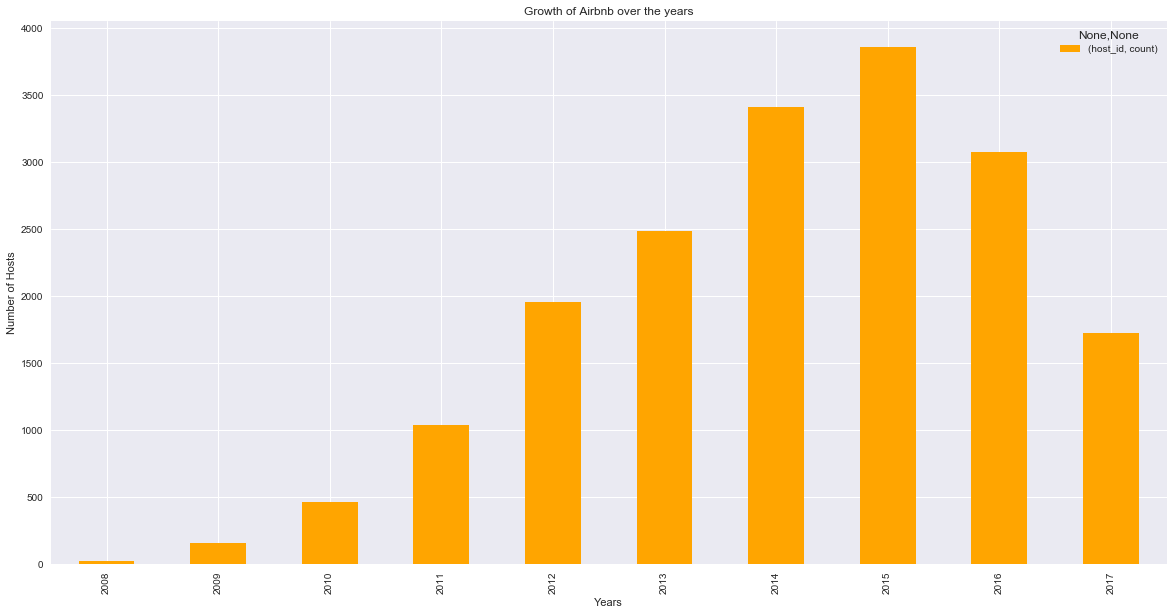

In [20]:
#Bar gragh to represent the growth of airbnb over the years in new york
ax2=growth.plot(kind='bar',figsize=(20,10),color='orange',title='Growth of Airbnb over the years')
ax2.set_xlabel('Years')
ax2.set_ylabel('Number of Hosts')
plt.show()

#Interesting to see how there is a drop in 2016 as there was lawsuit against Airbnb in New York 
#for illegally advertising entire unoccupied apartments for less than 30 days on Airbnb

In [21]:
# Now to study the imapct of Airbnb in the Hotel Industry
#Importing hotel datasets for Boston, Washington DC and  New York

#1.Hotels in Boston
hotels_boston = pd.read_csv('Data\Boston\hotelsData\hotel.csv',encoding = 'ISO-8859-1')
hotels_boston.head(3)

,latitude,longitude,hotel_name
0,42.35,-71.08,Boston Marriott Copley Place
1,42.37,-71.02,Hilton Boston Logan Airport
2,42.35,-71.08,The Lenox Hotel


In [22]:
#2.Hotels in DC
hotels_DC = pd.read_csv(r'Data\WashintonDC\Hotels.csv',encoding = 'ISO-8859-1')
hotels_DC.head(3)

,OBJECTID,PHONE,ZIP,GIS_ID,ADDRESS,NUMROOMS,NAME,X,Y,ADDRID
0,1,202-543-1020,20003,Htl_1,134 12TH STREET SE,5.0,A CAPITOL PLACE,400869.56,135613.84,66757
1,2,202-745-3600,20009,Htl_2,1746 LANIER PLACE NW,26.0,ADAMS INN,396392.87,139629.97,307146
2,3,202-904-2500,20006,Htl_3,1710 H STREET NW,142.0,AKA WHITE HOUSE,396504.91,136901.48,218432


In [23]:
#3. Hotels in NewYork

hotels_ny = pd.read_csv(r'Data\NewYork\tripadvisor_output.csv',encoding='iso8859')
hotels_ny.head(3)

,name,check_in,check_out,adults,rooms,address,provider,reviews,rating,price,range
0,Da Vinci Hotel,12/9/2017,12/10/2017,2,1,"244 W 56th St, New York City, NY 10019-4306",NaN,573,3.5,300,103-311
1,The Blakely New York,12/9/2017,12/10/2017,2,1,"136 W 55th St, Bet. 6th & 7th Avenue, New York...",Orbitz.com,"1,449",4.5,440,218-506
2,Hotel Deauville,12/9/2017,12/10/2017,2,1,"103 East 29th Street, New York City, NY 10016",Hotwire.com,NaN,4.0,145,135-175


In [24]:
#To compare Airbnb and Hotels in boston
#Match latitude and longitude of airbnb listings and hotels data to compare
#extracting latitude and longitude from airbnb listings and converting it to list
airbnb = pd.DataFrame()
airbnb['latitude'] = listings_boston['latitude'].ffill()
airbnb['longitude'] = listings_boston['longitude'].ffill()
latitudes_airbnb = airbnb['latitude']
longitudes_airbnb = airbnb['longitude']

airbnb_lat = latitudes_airbnb.tolist()
airbnb_lng = longitudes_airbnb.tolist()

In [25]:
#Extract latitude and longitude for hotels and converting it to list
hotel_latitude = hotels_boston.latitude
hotel_longitude = hotels_boston.longitude

hotels_lat = hotel_latitude.tolist()
hotels_lng = hotel_longitude.tolist()


latitudes = airbnb_lat + hotels_lat
longitudes = airbnb_lng + hotels_lng

In [26]:
#Now to plot airbnb vs hotels in boston
#Use gmplot to generate a html file with differnt airbnb listings and hotels in boston
gmap = gmplot.GoogleMapPlotter(hotels_lat[0], hotels_lng[0], 14)

gmap.scatter(airbnb_lat, airbnb_lng, '#3F3067', size=30, marker=False)
gmap.scatter(hotels_lat, hotels_lng, '#BB1F5C', size=30, marker=False)

gmap.draw("airbnbvshotels.html")

#From the map we can see how large the number of airbnb listings are compared to hotels in boston

In [27]:
#Number of unique airbnb listings in Boston

boston_airbnb_listings = listings_boston['host_id'].unique().tolist()
total_airbnb=len(boston_airbnb_listings)
total_airbnb

2700

In [28]:
#Number of hotels in boston
total_hotels=len(hotels_boston)
total_hotels

#Clearly people have a lot of options when it comes to Airbnb when compared to hotels

60

In [29]:
#Finally Hotels vs Airbnb in New York

#Geocoding from zipcodes to extract latitude and longitude
hotels=hotels_ny['address']
hoteldata=[data.split(',')[-1].lstrip().split(' ')[-1].split('-')[0] for data in hotels]
search = ZipcodeSearchEngine()
zipcode_lat = [search.by_zipcode(data).Latitude for data in hoteldata]
zipcode_lon = [search.by_zipcode(data).Longitude for data in hoteldata]
hotels_ny['latitude']=zipcode_lat
hotels_ny['longitude']=zipcode_lon
hotels_ny['zipcode']=hoteldata

In [30]:
#Creating a new data frame with hotel name, its latitude and longitudes
hotel_data=hotels_ny[np.isfinite(hotels_ny['latitude'])].filter(['name','latitude','longitude'], axis=1)
hotel_data.head(3)

,name,latitude,longitude
0,Da Vinci Hotel,40.77,-73.99
1,The Blakely New York,40.77,-73.99
2,Hotel Deauville,40.75,-73.98


In [31]:
#To plot values on map
locations = hotel_data[['name','latitude', 'longitude']]
locationlist = locations.values.tolist()


In [32]:
#Hotels in New york
map = folium.Map(location=[40.730610, -73.935242], zoom_start=10)
feature_group = folium.FeatureGroup("Locations")
for data in locationlist:
    feature_group.add_child(folium.Marker(location=[data[1],data[2]],popup=data[0]))
map.add_child(feature_group) 
map

In [33]:
#Whereas Airbnb in New York
#And I'm just using 1000 airbnb listings from 44000 listings in nyc
airbnb_data = listings_ny.filter(['latitude','longitude'], axis=1).head(1000)

#To plot values on map
locations1 = airbnb_data[['latitude', 'longitude']]
locationlist1 = locations1.values.tolist()

In [34]:
map = folium.Map(location=[40.730610, -73.935242], zoom_start=10)
feature_group = folium.FeatureGroup("Locations")
for data in locationlist1:
    feature_group.add_child(folium.Marker(location=[data[0],data[1]],icon=folium.Icon(color='red',icon='bullseye') ))
map.add_child(feature_group) 
map

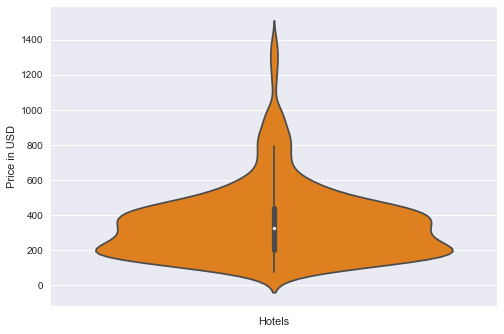

In [35]:
#Now to see the pricing differences between airbnbs and hotels
#Violin plot to represent the minimum,maximum price of hotel
sns.set_style("darkgrid")
ax = sns.violinplot(y=hotels_ny['price'],palette='autumn')
ax.set(xlabel='Hotels', ylabel='Price in USD')
plt.show()

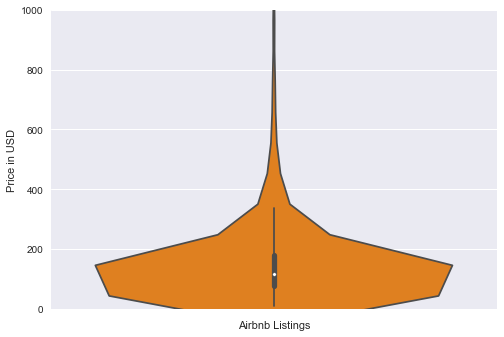

In [36]:
#Violin plot to represent the minimum,maximum price of airbnb

sns.set_style("darkgrid")
ax = sns.violinplot(y=listings_ny['price'],palette='autumn')
ax.set(xlabel='Airbnb Listings', ylabel='Price in USD')
ax.set(ylim=(0, 1000))
plt.show()

In [ ]:
#In conclusion Airbnb has a vast number of listings with various options for visitors to stay in,at famous tourist neighborhoods
#when compared to hotels at a lower price than staying at a hotel.
#This study hence proves that Airbnb is a potential competitor to the hotel industry.